In [1]:
import pandas as pd
import numpy as np

In [2]:
#a.Load the data into a Pandas DataFrame and display the first five rows.
#b. Display the column names and their data types.
sales = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')
sales.dtypes
sales.shape

(2823, 25)

In [3]:
#Count the total number of unique ORDERNUMBER values.

sales.drop_duplicates(subset='ORDERNUMBER', inplace=True)

sales['ORDERNUMBER']

0       10107
1       10121
2       10134
3       10145
4       10159
        ...  
2358    10199
2532    10397
2554    10352
2692    10118
2733    10294
Name: ORDERNUMBER, Length: 307, dtype: int64

In [4]:
sales['ORDERNUMBER'].nunique()

307

In [5]:
#Filter and display only the orders where the STATUS is "Shipped" and PRODUCTLINE is"Motorcycles".

sales[(sales['STATUS']=='Shipped')&(sales['PRODUCTLINE']=='Motorcycles')][['ORDERNUMBER','STATUS','PRODUCTLINE']]

,ORDERNUMBER,STATUS,PRODUCTLINE
0,10107,Shipped,Motorcycles
1,10121,Shipped,Motorcycles
2,10134,Shipped,Motorcycles
3,10145,Shipped,Motorcycles
4,10159,Shipped,Motorcycles
5,10168,Shipped,Motorcycles
6,10180,Shipped,Motorcycles
7,10188,Shipped,Motorcycles
8,10201,Shipped,Motorcycles
9,10211,Shipped,Motorcycles


In [6]:
#Find all orders with a SALES value greater than 4000 and display their ORDERNUMBER,SALES, and ORDERDATE.

sales[sales['SALES']>4000][['ORDERNUMBER','SALES','ORDERDATE','PRODUCTLINE']]

,ORDERNUMBER,SALES,ORDERDATE,PRODUCTLINE
4,10159,5205.27,10/10/2003 0:00,Motorcycles
7,10188,5512.32,11/18/2003 0:00,Motorcycles
9,10211,4708.44,1/15/2004 0:00,Motorcycles
14,10275,4177.35,7/23/2004 0:00,Motorcycles
15,10285,4099.68,8/27/2004 0:00,Motorcycles
...,...,...,...,...
1584,10340,4398.90,11/24/2004 0:00,Motorcycles
1712,10368,4107.20,1/19/2005 0:00,Classic Cars
2194,10387,4175.60,3/2/2005 0:00,Motorcycles
2692,10118,4219.20,4/21/2003 0:00,Ships


In [7]:
#Display orders from the year 2004 with a QUANTITYORDERED greater than 30

sales[(sales['QUANTITYORDERED']>30)&(sales['YEAR_ID']==2004)].sort_values(by='QUANTITYORDERED',ascending=True)[['ORDERNUMBER','QUANTITYORDERED','YEAR_ID','PRODUCTLINE']]

,ORDERNUMBER,QUANTITYORDERED,YEAR_ID,PRODUCTLINE
179,10320,31,2004,Classic Cars
202,10306,31,2004,Classic Cars
381,10271,31,2004,Trucks and Buses
39,10258,32,2004,Classic Cars
196,10220,32,2004,Classic Cars
...,...,...,...,...
564,10262,49,2004,Planes
175,10276,50,2004,Classic Cars
894,10257,50,2004,Vintage Cars
144,10229,50,2004,Classic Cars


In [8]:
#Calculate the total SALES for each YEAR_ID and PRODUCTLINE

year_sales= sales.groupby(['PRODUCTLINE','YEAR_ID'])['SALES'].sum().reset_index(name='Total Sales')
year_sales

,PRODUCTLINE,YEAR_ID,Total Sales
0,Classic Cars,2003,322186.67
1,Classic Cars,2004,389143.19
2,Classic Cars,2005,151547.04
3,Motorcycles,2003,47268.16
4,Motorcycles,2004,86902.04
5,Motorcycles,2005,35169.82
6,Planes,2003,18939.27
7,Planes,2004,55514.11
8,Planes,2005,13124.76
9,Ships,2003,8072.80


In [9]:
#Find the average PRICEEACH for each unique PRODUCTLINE

sales.groupby('PRODUCTLINE')['PRICEEACH'].mean().reset_index(name='Avg Price')

,PRODUCTLINE,Avg Price
0,Classic Cars,95.637818
1,Motorcycles,89.452826
2,Planes,92.076500
3,Ships,95.378000
4,Trains,81.690000
5,Trucks and Buses,99.782308
6,Vintage Cars,89.016071


In [10]:
# Identify the month (MONTH_ID) with the highest SALES in 2003.
#sales[['YEAR_ID','MONTH_ID','SALES']]

monthly_sales=sales.groupby(['YEAR_ID','MONTH_ID'])['SALES'].sum().reset_index()

monthly_sales[monthly_sales['YEAR_ID']==2003].sort_values(by='SALES',ascending=False).head(1)

,YEAR_ID,MONTH_ID,SALES
10,2003,11,139882.13


In [11]:
#Sort the DataFrame by ORDERDATE in ascending order and display the first five rows.

sales.sort_values(by='ORDERDATE', ascending=True).head(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
475,10102,39,100.0,2,4808.31,1/10/2003 0:00,Shipped,1,1,2003,...,2678 Kingston Rd.,Suite 101,NYC,NY,10022,USA,NaN,Frick,Michael,Medium
648,10366,34,100.0,3,4207.84,1/10/2005 0:00,Shipped,1,1,2005,...,"Boulevard Tirou, 255",NaN,Charleroi,NaN,B-6000,Belgium,EMEA,Cartrain,Pascale,Medium
63,10210,23,100.0,2,3009.09,1/12/2004 0:00,Shipped,1,1,2004,...,"Dojima Avanza 4F, 1-6-20 Dojima, Kita-ku",NaN,Osaka,Osaka,530-0003,Japan,Japan,Kentary,Mory,Medium
548,10367,49,56.3,1,2758.70,1/12/2005 0:00,Resolved,1,1,2005,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Small
9,10211,41,100.0,14,4708.44,1/15/2004 0:00,Shipped,1,1,2004,...,"25, rue Lauriston",NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium


In [12]:
#Find the top 3 orders with the highest SALES and display their ORDERNUMBER, SALES, and PRODUCTLINE.

top3_sales=sales.groupby(['PRODUCTLINE','ORDERNUMBER'])['SALES'].sum().reset_index()

top3_sales.sort_values(by='SALES', ascending=False).head(3)

,PRODUCTLINE,ORDERNUMBER,SALES
163,Classic Cars,10424,12001.0
106,Classic Cars,10312,11623.7
13,Classic Cars,10127,11279.2


In [13]:
#Create a new column called TOTAL_PRICE that calculates the total price for each order(QUANTITYORDERED * PRICEEACH).

sales['TOTAL_PRICE']=sales['QUANTITYORDERED']*sales['PRICEEACH']

sales[['QUANTITYORDERED','PRICEEACH','TOTAL_PRICE']]

,QUANTITYORDERED,PRICEEACH,TOTAL_PRICE
0,30,95.70,2871.00
1,34,81.35,2765.90
2,41,94.74,3884.34
3,45,83.26,3746.70
4,49,100.00,4900.00
...,...,...,...
2358,29,38.40,1113.60
2532,32,80.55,2577.60
2554,23,100.00,2300.00
2692,36,100.00,3600.00


In [14]:
#Convert the ORDERDATE column to a datetime format and extract the month name, saving in a new column called MONTH_NAME.

sales['ORDERDATE'] = pd.to_datetime(sales['ORDERDATE'])
sales['MONTH_NAME']=sales['ORDERDATE'].dt.month_name()

sales[['MONTH_NAME','ORDERDATE']]

sales.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE', 'TOTAL_PRICE', 'MONTH_NAME'],
      dtype='object')

In [15]:
#Replace any PRODUCTLINE labeled "Classic Cars" with "Vintage Cars"

sales['PRODUCTLINE']=sales['PRODUCTLINE'].replace('Classic Cars', 'Vintage Cars')

In [16]:
sales[['PRODUCTLINE']]

,PRODUCTLINE
0,Motorcycles
1,Motorcycles
2,Motorcycles
3,Motorcycles
4,Motorcycles
...,...
2358,Vintage Cars
2532,Ships
2554,Ships
2692,Ships


In [17]:
#Group the data by YEAR_ID and calculate the total SALES for each year.

sales.groupby('YEAR_ID')['SALES'].sum().reset_index(name='Total Sales')

,YEAR_ID,Total Sales
0,2003,504289.01
1,2004,654842.91
2,2005,249533.56


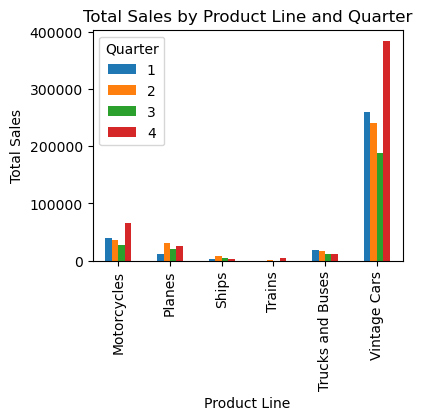

In [18]:
#Use a pivot table to display the total SALES for each PRODUCTLINE by QTR_ID.

import matplotlib.pyplot as plt

pivot_table = sales.pivot_table(values='SALES', index='PRODUCTLINE', columns='QTR_ID', aggfunc='sum')

pivot_table.plot(kind='bar', figsize=(4,3))
plt.title('Total Sales by Product Line and Quarter')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.legend(title='Quarter')

In [19]:
#Find the MSRP average for each PRODUCTLINE across all orders.

sales.groupby('PRODUCTLINE')['MSRP'].mean().reset_index(name='Avg MSRP')

,PRODUCTLINE,Avg MSRP
0,Motorcycles,100.065217
1,Planes,134.500000
2,Ships,92.200000
3,Trains,81.000000
4,Trucks and Buses,121.076923
5,Vintage Cars,149.538462


In [20]:
# What is the total quantity ordered for each PRODUCTLINE?

sales.groupby('PRODUCTLINE')['QUANTITYORDERED'].sum().reset_index(name='TOTAL_QUANTITY_ORDERED')

,PRODUCTLINE,TOTAL_QUANTITY_ORDERED
0,Motorcycles,1682
1,Planes,704
2,Ships,176
3,Trains,59
4,Trucks and Buses,468
5,Vintage Cars,7719


In [21]:
# How many orders were placed each quarter (QTR_ID) in 2003?

#sales.columns

#sales[['QTR_ID','YEAR_ID']]

qtrly_orders= (
    sales.groupby(['YEAR_ID','QTR_ID'])['SALES'].sum().reset_index()
)

qtrly_orders[qtrly_orders['YEAR_ID']==2003]

,YEAR_ID,QTR_ID,SALES
0,2003,1,69453.57
1,2003,2,87922.81
2,2003,3,96382.03
3,2003,4,250530.60


In [23]:
# Which ORDERNUMBER had the highest SALES in 2005?
sales[sales['YEAR_ID']==2005].sort_values(by='SALES', ascending=False)[['ORDERNUMBER','SALES','YEAR_ID']].head(1)

,ORDERNUMBER,SALES,YEAR_ID
53,10424,12001.0,2005


In [25]:
sales.to_csv('sales_data.csv', index=False)

In [26]:
sales.dtypes

ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
STATE                       object
POSTALCODE                  object
COUNTRY                     object
TERRITORY                   object
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                    object
TOTAL_PRICE                float64
MONTH_NAME                  object
dtype: object